[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pnii\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


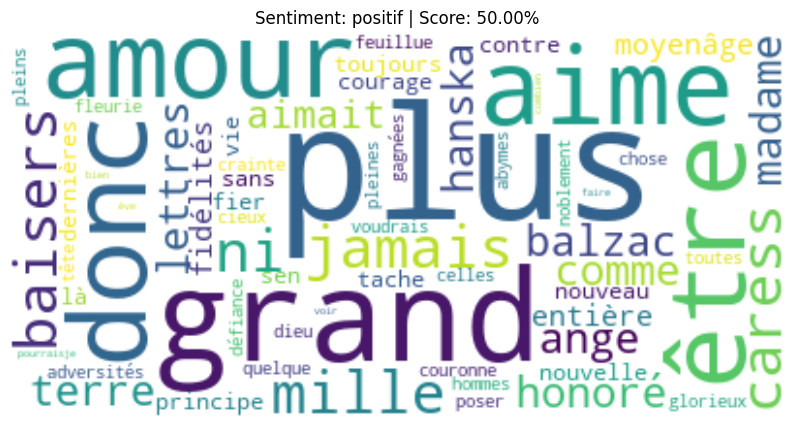

Pourcentage de réussite: 75.00%
Pourcentage d'échec: 25.00%


In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import string
import numpy as np
from PIL import Image
from textblob import TextBlob
import nltk
nltk.download('averaged_perceptron_tagger')



# Définir le texte
text = """
Honoré de Balzac, Lettres à Madame Hanska, 1899

« Je t’aime, mon ange de la terre, comme on aimait au Moyen-âge, avec la plus entière des fidélités, 
et mon amour sera toujours plus grand, sans tache, je suis fier de mon amour. 
C’est le principe d’une nouvelle vie. De là, le nouveau courage que je me sens contre mes dernières adversités. 
Je voudrais être plus grand, être quelque chose de glorieux pour que la couronne à poser sur ta tête fût la plus feuillue, 
la plus fleurie, de toutes celles qu’ont noblement gagnées les grands hommes. 
N’aie donc jamais ni défiance, ni crainte ; il n’y a pas d’abymes dans les cieux. 
Mille baisers pleins de caresses, mille caresses pleines de baisers. 
Mon Dieu, ne pourrais-je donc jamais te faire bien voir combien je t’aime, toi, mon Ève. »
"""

# Prétraitement du texte
# Tokenization
tokens = word_tokenize(text.lower())

# Suppression des stopwords et de la ponctuation
stop_words = set(stopwords.words('french'))  # Utilisez 'english' pour un texte en anglais
translator = str.maketrans('', '', string.punctuation)
words_clean = [word.translate(translator) for word in tokens if word not in stop_words]

# Lemmatization ou Stemming
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('french')  # Utilisez 'english' pour un texte en anglais
words_processed = [lemmatizer.lemmatize(word) for word in words_clean]  # Utilisez stemmer.stem() pour le stemming

# Création du bag of words
text_processed = ' '.join(words_processed)

# Analyse de sentiment
blob = TextBlob(text_processed)
sentiment_score = blob.sentiment.polarity * 100

# Classification des sentiments
if sentiment_score > 0:
    sentiment = "positif"
elif sentiment_score < 0:
    sentiment = "négatif"
else:
    sentiment = "neutre"

# Génération des nuages de mots
wordcloud = WordCloud(background_color='white').generate(text_processed)

# Affichage du nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Sentiment: {sentiment} | Score: {sentiment_score:.2f}%')
plt.axis('off')
plt.show()

# Calcul des pourcentages de réussite et d'échec
success_percentage = (blob.sentiment.polarity + 1) / 2 * 100
failure_percentage = 100 - success_percentage

print(f"Pourcentage de réussite: {success_percentage:.2f}%")
print(f"Pourcentage d'échec: {failure_percentage:.2f}%")